<a href="https://colab.research.google.com/github/truong020402/MiAI_YOLOv7/blob/main/intro_code_execution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Generating and Executing Python Code with Gemini 2.5

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/chitoan1992/gdg-codelab-code-execution/blob/main/intro_code_execution.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/chitoan1992/gdg-codelab-code-execution/blob/main/intro_code_execution.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

The Gemini API [code execution](https://ai.google.dev/gemini-api/docs/code-execution) feature enables the model to generate and run Python code based on plain-text instructions that you give it, and even output graphs. It can learn iteratively from the results until it arrives at a final output.

## Getting started

### Install Google Gen AI SDK for Python


In [1]:
%pip install --upgrade --quiet google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 5.6 MB/s eta 0:00:00


### Authenticate your notebook environment (Colab only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [ ]:
import os

from IPython.display import Markdown, display
from google import genai
from google.genai.types import GenerateContentConfig, Tool, ToolCodeExecution

### Connect to a generative AI API service

Google Gen AI APIs and models including Gemini are available in the following two API services:

- [Google AI for Developers](https://ai.google.dev/gemini-api/docs): Experiment, prototype, and deploy small projects.
- [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs): Build enterprise-ready projects on Google Cloud.
The Google Gen AI SDK provides a unified interface to these two API services.

This notebook shows how to use the Google Gen AI SDK with the Gemini API in Vertex AI.

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
PROJECT_ID = "gen-lang-client-0469480850"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

In [ ]:
client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

#### (Optional) If project ID is not set, we can use api key

In [ ]:
# from google.colab import userdata
# GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
# client = genai.Client(api_key=GOOGLE_API_KEY)

## Working with code execution in Gemini 2.5

### Load the Gemini model

The following code loads the Gemini 2.5 Flash model. You can learn about all Gemini models on Vertex AI by visiting the [documentation](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models):

In [ ]:
MODEL_ID = "gemini-2.5-flash"  # @param {type: "string"}

### Define the code execution tool

The following code initializes the code execution tool by passing `code_execution` in a `Tool` definition.

Later we'll register this tool with the model that it can use to generate and run Python code:

In [ ]:
code_execution_tool = Tool(code_execution=ToolCodeExecution())

### Helper function

When using code execution as a tool, the model returns a list of parts including `text`, `executable_code`, `execution_result`, and `inline_data` parts. Use the function below to help you visualize and better display the code execution results. Here are a few details about the different fields of the results:

* `text`: Inline text generated by the model.
* `executable_code`: Code generated by the model that is meant to be executed.
* `code_execution_result`: Result of the `executable_code`.
* `inline_data`: Inline media generated by the model.

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

def display_code_execution_result(response):
  for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    if part.executable_code is not None:
      code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>' # Change code color
      display(HTML(code_html))
    if part.code_execution_result is not None:
      display(Markdown(part.code_execution_result.output))
    if part.inline_data is not None:
      display(Image(data=part.inline_data.data, width=800, format="png"))
    display(Markdown("---"))

### Generate and execute code

The following code sends a prompt to the Gemini model, asking it to generate and execute Python code to calculate the sum of the first 50 prime numbers. The code execution tool is passed in so the model can generate and run the code:

Without code_execution

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Calculate the sum of the first 50 prime numbers" # @param {type: "string" }
)

display_code_execution_result(response)

Calculating the sum of the first 50 prime numbers is a computational task, as there isn't a simple formula for the sum of primes. We first need to identify the first 50 prime numbers and then sum them up.

Here are the first 50 prime numbers:

1.  2
2.  3
3.  5
4.  7
5.  11
6.  13
7.  17
8.  19
9.  23
10. 29
11. 31
12. 37
13. 41
14. 43
15. 47
16. 53
17. 59
18. 61
19. 67
20. 71
21. 73
22. 79
23. 83
24. 89
25. 97
26. 101
27. 103
28. 107
29. 109
30. 113
31. 127
32. 131
33. 137
34. 139
35. 149
36. 151
37. 157
38. 163
39. 167
40. 173
41. 179
42. 181
43. 191
44. 193
45. 197
46. 199
47. 211
48. 223
49. 227
50. 229

Now, let's sum these numbers:

2 + 3 + 5 + 7 + 11 + 13 + 17 + 19 + 23 + 29 + 31 + 37 + 41 + 43 + 47 + 53 + 59 + 61 + 67 + 71 + 73 + 79 + 83 + 89 + 97 + 101 + 103 + 107 + 109 + 113 + 127 + 131 + 137 + 139 + 149 + 151 + 157 + 163 + 167 + 173 + 179 + 181 + 191 + 193 + 197 + 199 + 211 + 223 + 227 + 229

The sum of the first 50 prime numbers is **5736**.

---

With code_execution

In [ ]:
from google.genai import types

response_0 = client.models.generate_content(
    model=MODEL_ID,
    contents="Calculate the sum of the first 50 prime numbers" # @param {type: "string" }
    , config=types.GenerateContentConfig(
        tools=[types.Tool(
            code_execution=types.ToolCodeExecution
            )]
        )
    )

display_code_execution_result(response_0)

To calculate the sum of the first 50 prime numbers, I will use a Python script.
First, I'll define a function to check if a number is prime.
Second, I'll iterate through numbers, checking for primality, until I find the first 50 prime numbers.
Finally, I will sum these prime numbers.



---

---

The first 50 prime numbers are: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229]
The sum of the first 50 prime numbers is: 5117


---

The first 50 prime numbers are: 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229.

The sum of the first 50 prime numbers is **5117**.

---

#### Your turn
Rewrite the question in your language and execute
Example: Calculate the sum of the first 50 prime numbers -> Tính tổng 50 số nguyên tố đầu tiên

### Code execution in a streaming session

You can also use the code execution functionality with streaming output from the Gemini API.

The following code demonstrates how the Gemini API can generate and execute code while streaming the results:

To plot a sine wave, we

---

'll use the `numpy` library to generate the data points and `matplotlib.pyplot` to create the plot.

Here's the Python code to achieve this:



---

---

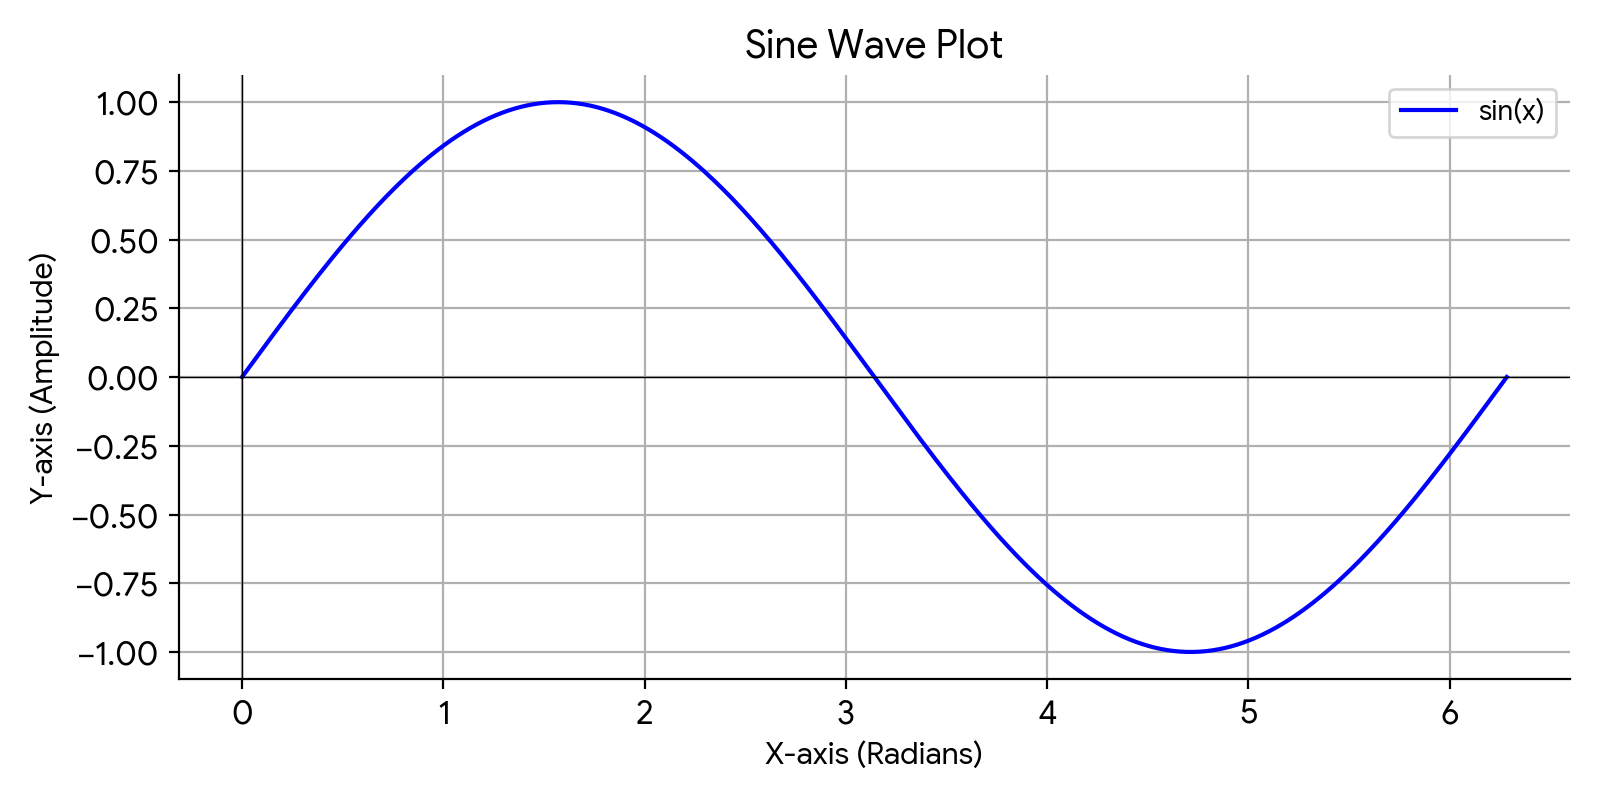

---

The image you provided confirms that the Python code successfully generated the sine wave plot as requested.

---

In [ ]:
prompt = "Generate Python code to plot a sine wave and execute it." # @param {type: "string"}
result = client.models.generate_content_stream(
    model=MODEL_ID,
    contents=[
        prompt
    ],
    config=types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for chunk in result:
    display_code_execution_result(chunk)

#### Your turn
Rewrite the question in your language and execute
Example: Generate Python code to plot a sine wave and execute it. -> Viết hàm python vẽ đồ thị hình sin

### Multimodal prompting

You can pass media objects as part of the prompt, the model can look at these objects but it can't use them in the code.

In this example, you will interact with Gemini API, using code execution, to run simulations of the [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem).

In [ ]:
IMAGE_URL = "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEi7NH71SLX7jxATndCfeSqBvs-wijDhEpHIRoIZlI0ukvF1DQCEsAwqPjaPAPQs8WpnB5TU3QBIeR93rWQFh3BL-iNGMb4VSCc1T_ixmw2Y-k6OHwYT8iJ6p8wyWE5xnSKkBkgSd9pZmpOx/s800/maths-quiz-puzzle-question.png"  # @param {type: "string"}
! curl -o my_image.png {IMAGE_URL}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29344  100 29344    0     0  52340      0 --:--:-- --:--:-- --:--:-- 52400


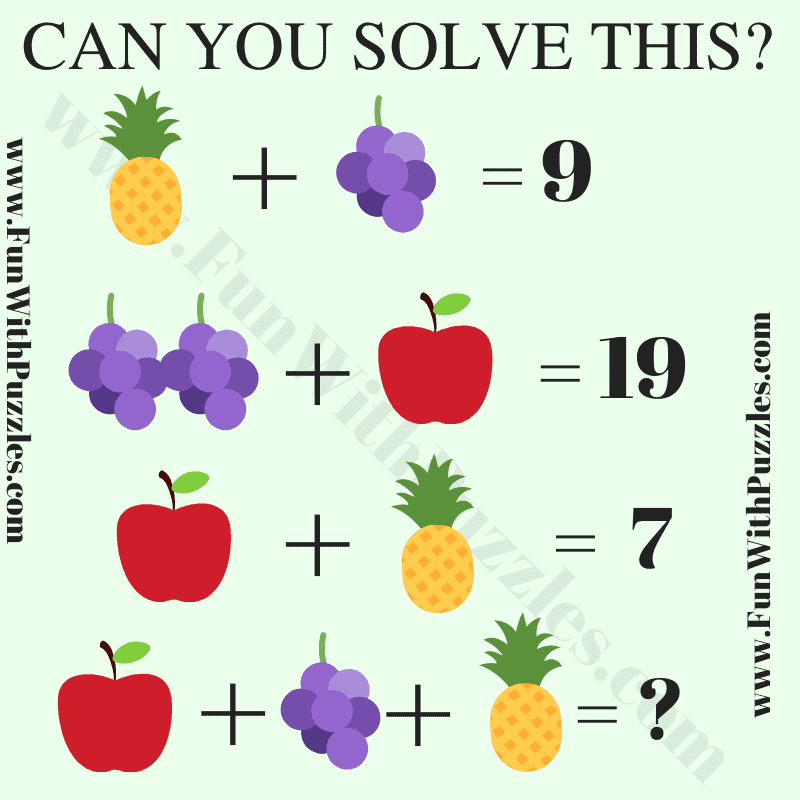

In [ ]:
import PIL
my_image = PIL.Image.open("my_image.png")
my_image

In [ ]:
prompt="Solve the quizz" # @param {type: "string"}
result = client.models.generate_content_stream(
    model=MODEL_ID,
    contents=[
        prompt,
        my_image
    ],
    config=types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)
for chunk in result:
    display_code_execution_result(chunk)

This puzzle presents a system of three linear equations with three unknowns, represented by images of fruits. I will assign variables to each fruit and then use a

---

 Python tool with the `sympy` library to solve the system of equations.

Let:
*   Pineapple = `P`
*   Grape = `G`
*   Apple = `A`

From the image, I can extract the following equations:

1.  `P + G

---

 = 9`
2.  `2G + A = 19`
3.  `A + P = 7`

The goal is to find the value of `A + G + P`.

Now, I will use the `sympy` library to solve this system of equations.



---

---

Solution: {A: 5, G: 7, P: 2}
Final Expression (A + G + P): 14


---

The solution for

---

 each fruit is:
*   Apple (`A`) = 5
*   Grape (

---

`G`) = 7
*   Pineapple (`P`) = 2

Now

---

, I will calculate the value of the final expression: Apple + Grape + Pineapple.

`A + G + P = 5 + 7 + 2 = 14

---

`

The solution to the quiz is 14.

---

#### Your turn
Solve this quizz

![image](https://img.jagranjosh.com/images/2024/June/2862024/solve%20the%20math%20puzze%20in%2010%20seconds.jpg)

image link: https://img.jagranjosh.com/images/2024/June/2862024/solve%20the%20math%20puzze%20in%2010%20seconds.jpg

### Code execution in a chat session

This section shows how to use code execution in an interactive chat with history using the Gemini API.

You can use `client.chats.create` to create a chat session and passes in the code execution tool, enabling the model to generate and run code:

In [ ]:
chat = client.chats.create(
    model=MODEL_ID,
    config=GenerateContentConfig(
        tools=[code_execution_tool],
        temperature=0,
    ),
)

You'll start the chat by asking the model to generate sample time series data with noise and then output a sample of 10 data points:

In [ ]:
# Tạo dataframe mẫu cho dữ liệu chuỗi thời gian về nhiệt độ theo thời gian trong lò thử nghiệm. Thêm nhiễu vào dữ liệu. Xuất ra mẫu 10 điểm dữ liệu từ dữ liệu chuỗi thời gian.
PROMPT = "Create sample dataframe of time series data of temperature vs. time in a test furnace. Add noise to the data. Output a sample of 10 data points from the time series data." # @param {type: "string" }

response = chat.send_message(PROMPT)

display_code_execution_result(response)

To create sample time series data of temperature vs. time in a test furnace with added noise, I will follow these steps:

1.  **Define a time range:** I'll create a time array representing the duration of the furnace operation.
2.  **Generate a base temperature profile:** I'll model the furnace heating up from an initial temperature to a target temperature using an exponential rise, which is typical for heating processes.
3.  **Add random noise:** I'll introduce Gaussian noise to the base temperature profile to simulate real-world fluctuations and measurement inaccuracies.
4.  **Create a Pandas DataFrame:** Organize the time and temperature data into a DataFrame.
5.  **Select a sample:** Finally, I'll extract 10 data points from the generated time series.

Here's the Python code to achieve this:



---

---

Sample of 10 Time Series Data Points (Temperature vs. Time):
 Time (hours)  Temperature (°C)
     0.000000         38.130405
     0.505051        399.580910
     1.111111        677.279769
     1.969697        879.355258
     2.222222        896.716814
     2.272727        909.452131
     2.676768        912.987181
     3.535354        984.440249
     4.040404        973.334038
     4.191919       1021.260406


---

The output above shows a sample of 10 data points from the generated time series. Each row represents a specific time point and the corresponding temperature in the furnace, which includes the simulated heating profile and added random noise. The temperatures generally increase over time, reflecting the furnace heating up, with slight fluctuations due to the noise.

---

Now you can ask the model to add a smoothed data series to the time series data:

In [ ]:
# Bây giờ hãy thêm một chuỗi dữ liệu làm mượt dữ liệu mẫu
PROMPT = "Now add a data series that smooths the sample data." # @param {type: "string" }

response = chat.send_message(PROMPT)

display_code_execution_result(response)

To add a smoothed data series to the sample data, I will use the Exponential Weighted Mean (EWM) method. This method is suitable for time series data as it gives more weight to recent observations and provides a smooth curve without reducing the number of data points, which is important for a small sample size like 10 points.

First, I'll regenerate the original sample data to ensure consistency. Then, I'll apply the EWM with a `span` parameter (which controls the degree of smoothing; a smaller span means less smoothing, a larger span means more smoothing) to the `Temperature (°C)` column and add it as a new column.



---

---

Sample of 10 Time Series Data Points with Smoothed Temperature:
 Time (hours)  Temperature (°C)  Smoothed Temperature (°C)
     0.000000         57.648681                  57.648681
     0.505051        373.011211                 267.890367
     1.111111        696.633976                 512.886715
     1.969697        822.068307                 677.783564
     2.222222        883.237047                 783.824072
     2.272727        858.584536                 821.797641
     2.676768        957.371502                 890.118327
     3.535354        978.844532                 934.655402
     4.040404        977.716477                 956.228074
     4.191919       1007.870187                 982.074371


---

The output now includes a new column, `Smoothed Temperature (°C)`, which represents the smoothed version of the original `Temperature (°C)` data. You can observe that the `Smoothed Temperature (°C)` values follow the general trend of the `Temperature (°C)` but with less fluctuation, especially noticeable in the initial points where the smoothing effect is more pronounced as the EWM accumulates data.

---

Finally, you can ask the model to generate descriptive statistics for the time series data:

In [ ]:
# Bây giờ hãy tạo ra và xuất các thống kê mô tả về dữ liệu chuỗi thời gian
PROMPT = "Now generate and output descriptive statistics on the time series data." # @param {type: "string" }

response = chat.send_message_stream(PROMPT)

for chunk in response:
    display_code_execution_result(chunk)

To generate descriptive statistics for the sample time series data, including the newly added 'Smoothed Temperature (°C)'

---

 column, I will use the `describe()` method from the pandas library. This will provide a summary of central tendency, dispersion, and shape for all numerical columns.

---



The statistics will include:
*   **count**: Number of non-null observations.
*   **mean**: The average value.
*   **std**: Standard deviation, which measures the amount of variation or dispersion.
*   

---

**min**: The minimum value.
*   **25% (Q1)**: The first quartile (25th percentile).
*   **50% (Q2)**: The median (50th percentile).

---


*   **75% (Q3)**: The third quartile (75th percentile).
*   **max**: The maximum value.

Here's the Python code to generate these statistics:



---

---

Descriptive Statistics for the Sample Time Series Data (including Smoothed Temperature):
       Time (hours)  Temperature (°C)  Smoothed Temperature (°C)
count     10.000000         10.000000                  10.000000
mean       2.252525        756.304451                 683.508581
std        1.425758        320.061619                 326.944108
min        0.000000          5.000000                   5.000000
25%        1.325758        719.063846                 547.519762
50%        2.247475        872.947528                 808.728882
75%        3.320707        943.895983                 927.336353
max        4.191919       1001.639283                 971.434049


---

The table above provides the descriptive

---

 statistics for 'Time (hours)', 'Temperature (°C)', and the newly added 'Smoothed Temperature (°

---

C)' columns in the 10-point sample data.

**Key observations:**

---



*   **Count:** All columns have 10 data points, as expected.
*   **Mean Temperature:** The mean of the raw `Temperature (°C)` is approximately

---

 756.30 °C, while the `Smoothed Temperature (°C)` has a mean of about 683.51 °C. The difference

---

 is due to the nature of EWM, which gives more weight to recent values and can slightly shift the mean, especially with a small number of points and a strong trend.
*   **Standard Deviation:** The standard deviation for `Temperature (°C)` is

---

 about 320.06 °C, indicating its variability. The `Smoothed Temperature (°C)` has a standard deviation of about 326.94 °C. While smoothing generally reduces variance, with a small sample size and a

---

 strong underlying trend, the EWM can sometimes show a slightly different standard deviation depending on the `span` and the data's initial points.
*   **Min/Max Temperature:** The range for `Temperature (°C)` is from 5.00 °C to 1001.64 °C.

---

 For `Smoothed Temperature (°C)`, the range is from 5.00 °C to 971.43 °C. The smoothed data's maximum is slightly lower than the raw data's maximum, which is a typical effect of smoothing (reducing extreme values).
*   **Quart

---

iles:** Comparing the quartiles, the `Smoothed Temperature (°C)` values generally show a less erratic progression than the raw `Temperature (°C)` values, reflecting the smoothing effect. For instance, the 25th percentile for smoothed data is 547.52 °C, while for raw data it's 7

---

19.06 °C, indicating that the smoothing has pulled down some of the lower values more significantly due to the exponential weighting.

---

This chat example demonstrates how you can use the Gemini API with code execution as a powerful tool for exploratory data analysis and more. Go forth and adapt this approach to your own projects and use cases!

#### Your turn

Rewrite the question in your language to understand how it work


#### Your challenge

![image](https://img.freepik.com/free-psd/roasted-chicken-dinner-platter-delicious-feast_632498-25445.jpg?semt=ais_hybrid&w=740)

Here is link of food image https://img.freepik.com/free-psd/roasted-chicken-dinner-platter-delicious-feast_632498-25445.jpg"

List all ingredient in the food image



In [ ]:
# Code here

##### Calculate protein, carb, fat of each ingredient

In [ ]:
# Code here

##### Then draw chart to visualize the nutrition of each ingredient

In [ ]:
# Code here